In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [178]:
def load_data() :
    print("Loading Data...")
    df = pd.read_csv('./diamonds.csv')

    categorical_columns = ['cut', 'color', 'clarity']
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)
    
    # print(df.columns)

    y = df['price'].to_numpy()
    
    x = df.drop(columns=['S.No', 'price']).to_numpy()
    x = np.hstack([np.ones((x.shape[0], 1)), x])

    print("Loading Complete....")
    return x, y

x, y = load_data()


Loading Data...
Loading Complete....


In [179]:
from sklearn.preprocessing import StandardScaler


def normalize(x, y):
    x_no_bias = x[:, 1:]

    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x_no_bias)

    y_mean = np.mean(y)
    y_std = np.std(y)

    y = (y - y_mean) / y_std

    # Add the bias column (ones) back after scaling
    x = np.hstack([np.ones((x.shape[0], 1)), x_scaled])

    print("Feature scaling done.")
    return x, y, y_mean, y_std

x, y, y_mean, y_std = normalize(x, y)


Feature scaling done.


In [180]:
def split_data(x, y):
    tot_rows = x.shape[0]
    indices = np.random.choice(tot_rows, size=int(0.8 * tot_rows), replace=False)

    x_train = x[indices]
    y_train = y[indices]

    x_test = np.delete(x, indices, axis=0)
    y_test = np.delete(y, indices, axis=0)

    print('Data split for training and testing')

    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = split_data(x, y)


Data split for training and testing


In [181]:
def model(W, X):
    pred_y = np.dot(X, W)

    # print(W.shape)
    # print(x_train.shape)
    # print(pred_y)
    return pred_y

In [182]:
def compute_error(pred_y, y_train):
    error_vector = np.subtract(pred_y, y_train)
    error_vector = np.square(error_vector)

    mean_error = np.mean(error_vector)
    return mean_error

In [183]:

degree = x.shape[1]
W = np.random.rand(degree) * 0.01
epochs = 5000
learning_rate = 0.001

print('Variables initialised')
print("Random Weights :")
print(W)

Variables initialised
Random Weights :
[0.00498231 0.00430803 0.00979966 0.00379843 0.00493216 0.00208084
 0.0007437  0.00206752 0.00430288 0.00084899 0.0079578  0.00889705
 0.00668405 0.00862517 0.00801159 0.00512309 0.00092717 0.00274591
 0.0043236  0.00370366 0.00291848 0.0036279  0.00657974 0.00335055]


In [184]:
def adam_optimiser(W, x_train, y_train, epochs, learning_rate):
    print("Running ADAM : ")

    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8

    m = np.zeros_like(W)
    v = np.zeros_like(W)

    error_over_time = []

    for i in range (1, epochs + 1):
        pred_y = model(W, x_train)

        mean_error = compute_error(pred_y, y_train)
        error_over_time.append(mean_error)

        gradient = (2 / x_train.shape[0]) * np.dot(x_train.T, (pred_y - y_train))

        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)

        m_hat = m / (1 - beta1 ** i)
        v_hat = v / (1 - beta2 ** i)

        W = W - learning_rate * (m_hat / (np.sqrt(v_hat) + epsilon))

        if (i % 100 == 0 or i == 1 or i == epochs):
            print(f'epoch : {i}')

    return W, error_over_time

W, error_over_time = adam_optimiser(W, x_train, y_train, epochs, learning_rate)

Running ADAM : 
epoch : 1


epoch : 100
epoch : 200
epoch : 300
epoch : 400
epoch : 500
epoch : 600
epoch : 700
epoch : 800
epoch : 900
epoch : 1000
epoch : 1100
epoch : 1200
epoch : 1300
epoch : 1400
epoch : 1500
epoch : 1600
epoch : 1700
epoch : 1800
epoch : 1900
epoch : 2000
epoch : 2100
epoch : 2200
epoch : 2300
epoch : 2400
epoch : 2500
epoch : 2600
epoch : 2700
epoch : 2800
epoch : 2900
epoch : 3000
epoch : 3100
epoch : 3200
epoch : 3300
epoch : 3400
epoch : 3500
epoch : 3600
epoch : 3700
epoch : 3800
epoch : 3900
epoch : 4000
epoch : 4100
epoch : 4200
epoch : 4300
epoch : 4400
epoch : 4500
epoch : 4600
epoch : 4700
epoch : 4800
epoch : 4900
epoch : 5000


In [185]:
def gradient_descent(W, x_train, y_train, epochs, learning_rate):
    print("Running gradient descent : ")
    error_over_time = []

    for i in range (epochs):
        pred_y = model(W, x_train)

        mean_error = compute_error(pred_y, y_train)
        error_over_time.append(mean_error)

        gradient = (2 / x_train.shape[0]) * np.dot(x_train.T, (pred_y - y_train))

        # print(gradient.shape)
        # print(gradient)

        W = W - learning_rate * gradient

        if (i % 100 == 0 or i == epochs - 1):
            print(f'epoch : {i}')

    return W, error_over_time

# W, error_over_time = gradient_descent(W, x_train, y_train, epochs, learning_rate)
    

Plotting Error :


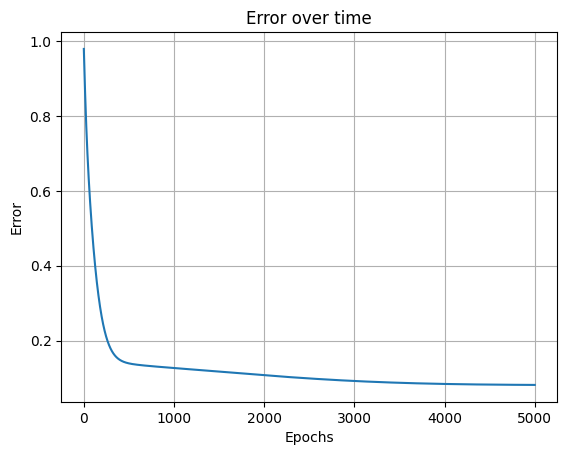

In [186]:
def plot_error(error_over_time):
    print("Plotting Error :")
    x_axis = np.arange(epochs)
    y_axis = error_over_time

    plt.plot(x_axis, y_axis)
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title("Error over time")
    plt.grid(True)
    
    plt.show()


plot_error(error_over_time)

In [187]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def test_accuracy(W, x_test, y_test):
    pred_y = model(W, x_test)

    pred_y_norm = model(W, x_test)
    
    # Denormalize predictions
    pred_y = pred_y_norm * y_std + y_mean
    y_test = y_test * y_std + y_mean

    mse = mean_squared_error(y_test, pred_y)
    mae = mean_absolute_error(y_test, pred_y)
    r2 = r2_score(y_test, pred_y)

    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Error : {mae}")
    print(f"R2 Score : {r2}")
    
test_accuracy(W, x_test, y_test)

Mean Squared Error : 1267122.0114992245
Mean Absolute Error : 757.4082732436934
R2 Score : 0.9204169055578669


In [189]:
import pickle

def save_data():
    model_data = {
        'weights': W,
    }

    with open('diamond_prediction.pkl', 'wb') as f:
        pickle.dump(model_data, f)
    
    print("Model saved successfully.")

save_data()

Model saved successfully.
